# Analysing the dataset for normality test
### Stage 1: spliting the whole dataset into 2 parts, before week 38 (including week 1 through 37) and after week 38 (including week 38 through 81)

In [1]:
%matplotlib notebook
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from seaborn_qqplot import pplot
from scipy.stats import norm

#Enter the path of "Weekly tweets.csv" Dataet
df=pd.read_csv(r"D:\uni\ترم 5\کنترل کیفیت آماری\Project\Data\Weekly tweets.csv" ).drop(columns='Unnamed: 0')
df.columns=['tweets']

df_part1=df.loc[:38]
df_part2=df.loc[38:]
df_part1.head()

,tweets
0,22031518
1,20974206
2,18489929
3,18494095
4,21876990


In [2]:
df_part2.head()

,tweets
38,15397240
39,14293893
40,15965067
41,16265151
42,15501608


### Stage 2: Analyzing Part 1 of the dataset

<IPython.core.display.Javascript object>


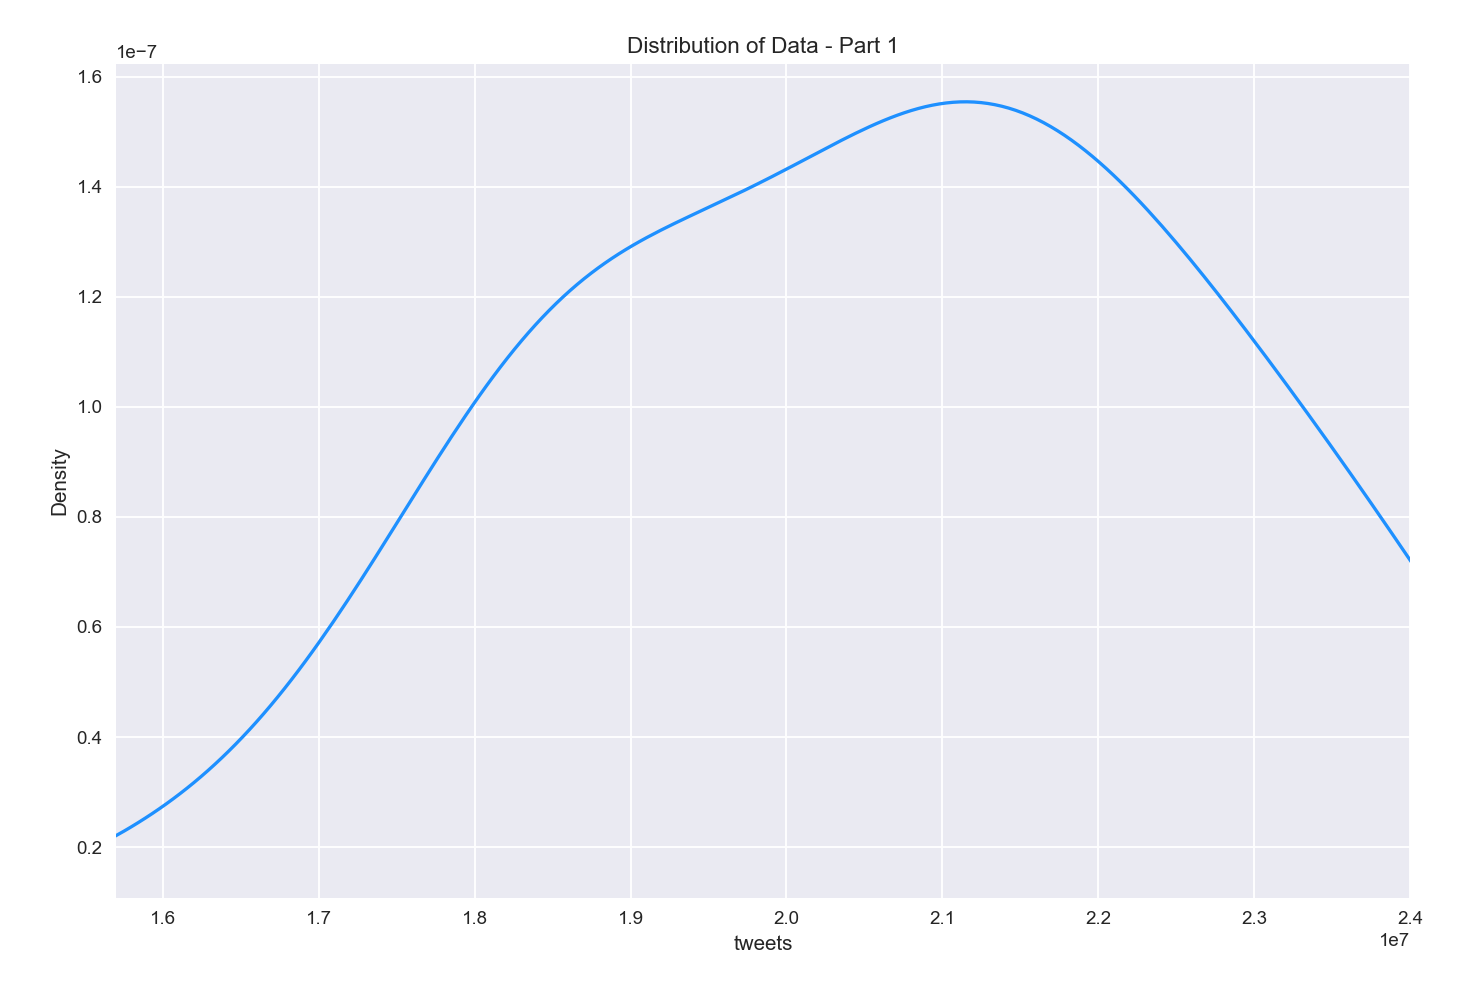

In [3]:
plt.style.use('seaborn')
fig , ax=plt.subplots()
ax=sns.kdeplot(data=df_part1, x="tweets", cut=0,color='dodgerblue')
ax.set_xlim((1.57e7,2.4e7))
ax.set_title('Distribution of Data - Part 1')
plt.tight_layout()
# plt.savefig('kde pt1',dpi=1000,edgecolor='black',bbox_inches='tight')
plt.show()

<IPython.core.display.Javascript object>


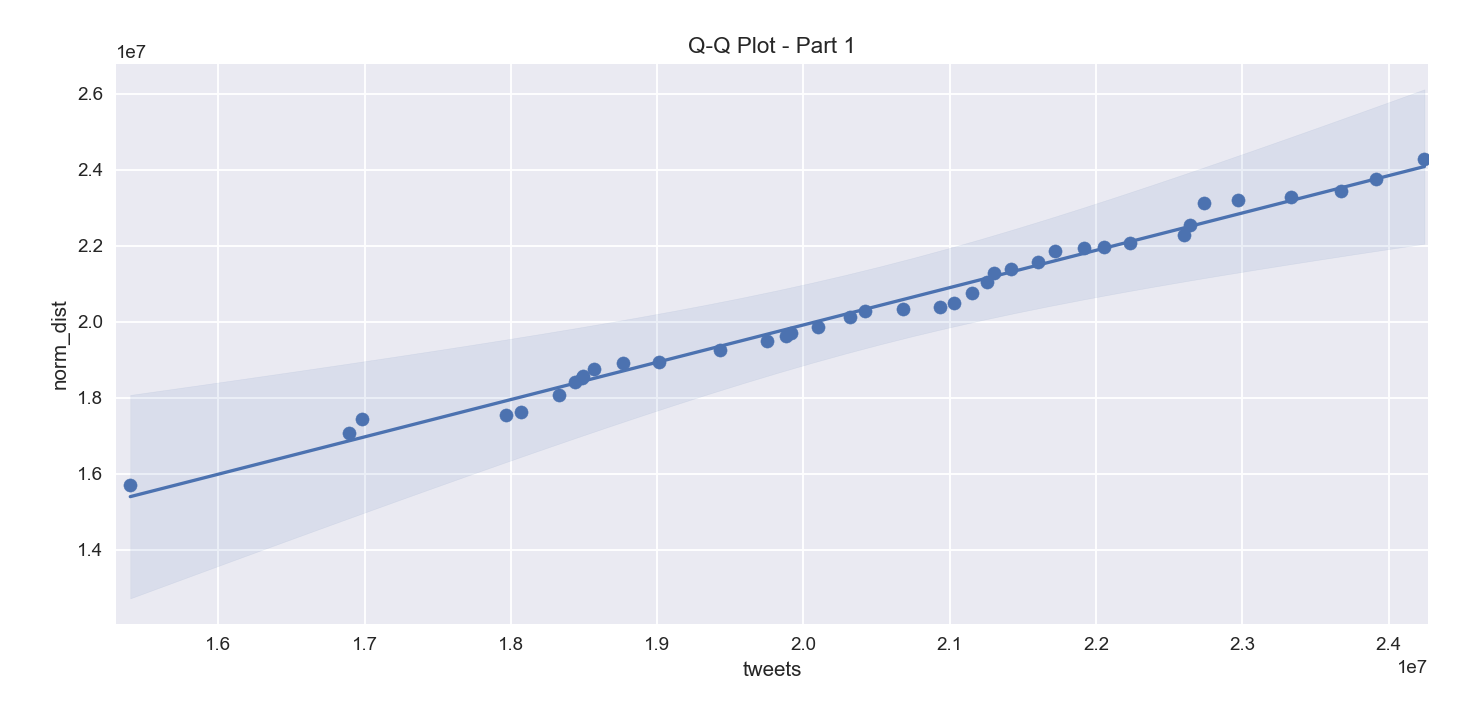

In [4]:
# plt.figure()
pplot(df_part1, x="tweets", y=norm, kind='qq',height=4, aspect=2, display_kws={"identity":False, "fit":True, "reg":True, "ci":0.05})
plt.xlim((1.53e7,2.427e7))
plt.title('Q-Q Plot - Part 1')
plt.tight_layout()
# plt.savefig('kde pt1',dpi=1000,edgecolor='black',bbox_inches='tight')
plt.show()

##### Normal test using SciPy lib

In [5]:
k2, p = stats.normaltest(df_part1['tweets'])
print('pvalue= {}'.format(p))

pvalue= 0.6693522861627506


so we cannot reject H0, and we can consider the data normal

### Stage 3: Analyzing Part 2 of the dataset

<IPython.core.display.Javascript object>


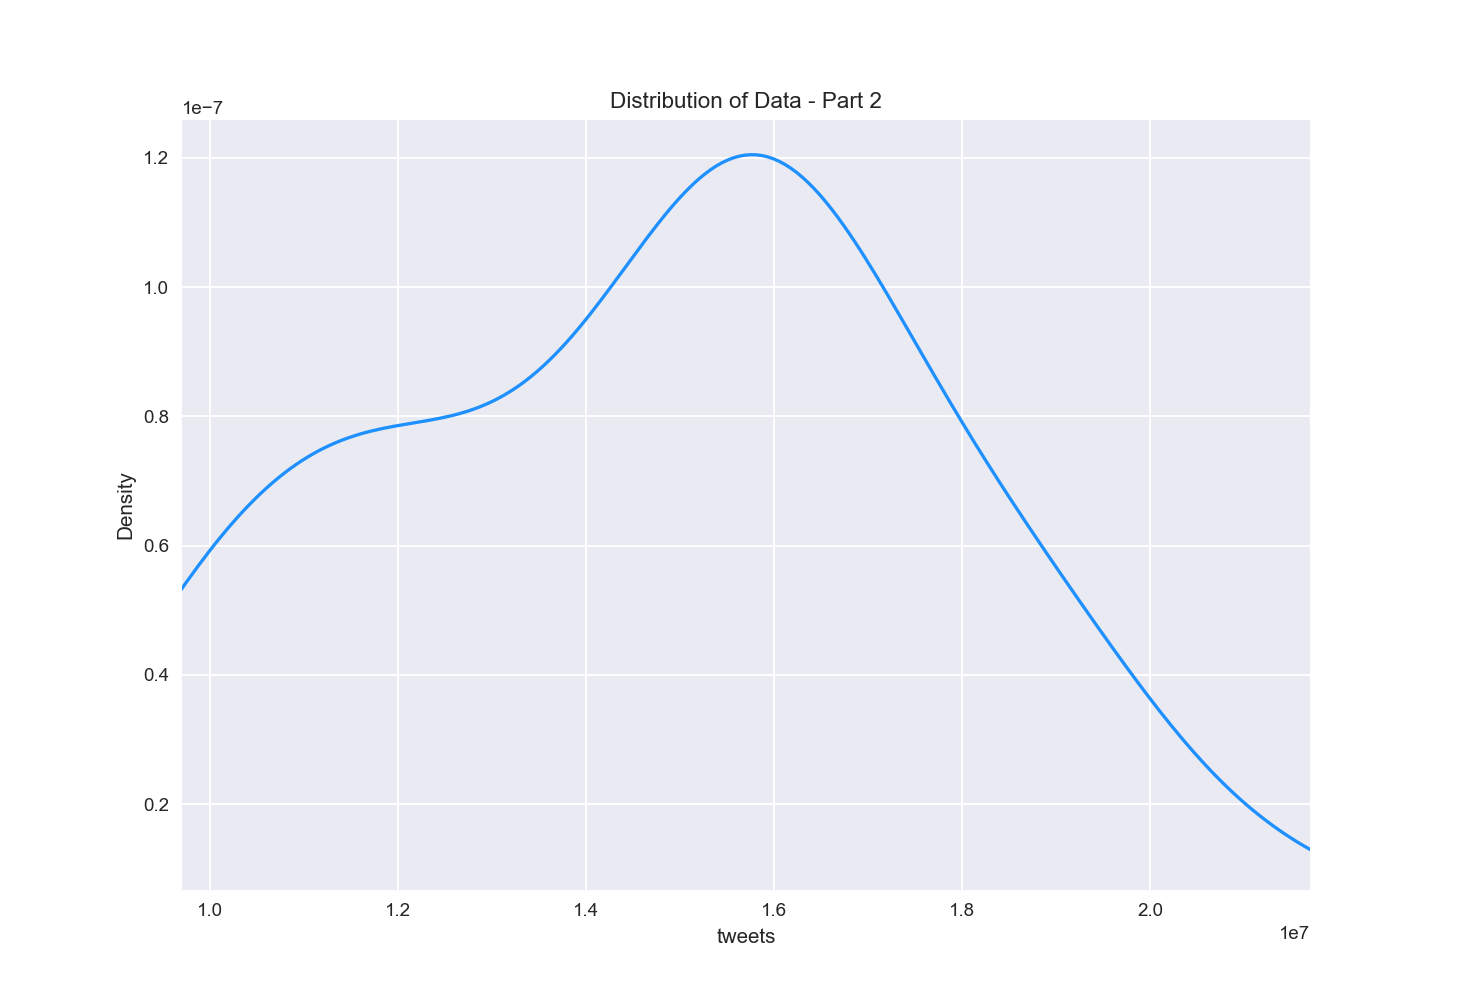

In [6]:
fig , ax=plt.subplots()
ax=sns.kdeplot(data=df_part2, x="tweets", cut=0,color='dodgerblue')
ax.set_xlim((0.97e7,2.17e7))
ax.set_title('Distribution of Data - Part 2')
plt.show()
# plt.savefig('kde 2.png',dpi=1000,edgecolor='black',bbox_inches='tight')

<IPython.core.display.Javascript object>


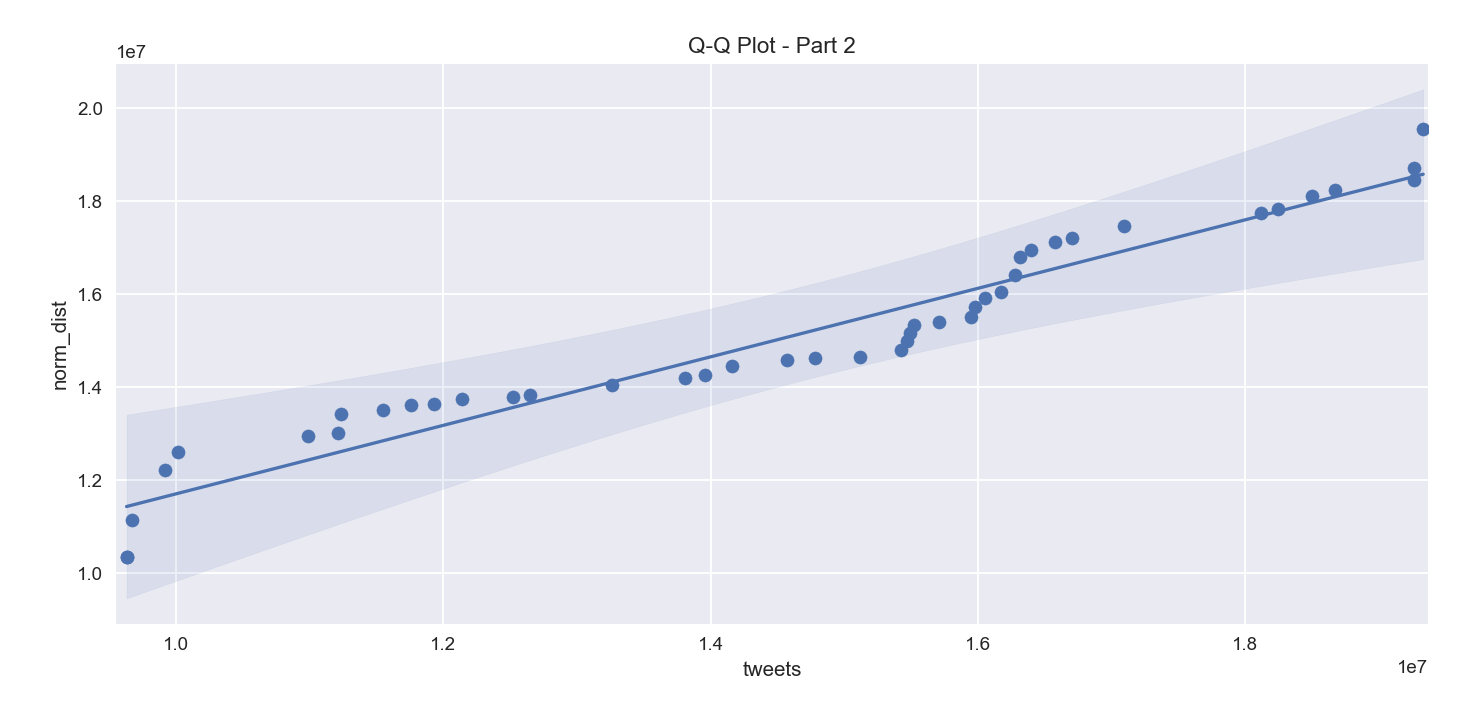

In [7]:
pplot(df_part2, x="tweets", y=norm, kind='qq',height=4, aspect=2, display_kws={"identity":False, "fit":True, "reg":True, "ci":0.05})
plt.xlim((0.955e7,1.937e7))
plt.title('Q-Q Plot - Part 2')
plt.tight_layout()
# plt.savefig('QQ Pt2.png',dpi=1000,edgecolor='black',bbox_inches='tight')

##### Normal test using SciPy lib

In [8]:
k2, p = stats.normaltest(df_part2['tweets'])
print('pvalue= {}'.format(p))

pvalue= 0.5621456751506336


so we cannot reject H0, and we can consider the data normal

# WHO Dataset Cleaning

In [9]:
import pandas as pd
import numpy as np

#Enter the path of "\WHO-COVID-19-global-data.csv" Dataset
df=pd.read_csv(r"D:\uni\ترم 5\کنترل کیفیت آماری\Project\Data\WHO-COVID-19-global-data.csv")
df.head()

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
0,2020-01-03,AF,Afghanistan,EMRO,0,0,0,0
1,2020-01-04,AF,Afghanistan,EMRO,0,0,0,0
2,2020-01-05,AF,Afghanistan,EMRO,0,0,0,0
3,2020-01-06,AF,Afghanistan,EMRO,0,0,0,0
4,2020-01-07,AF,Afghanistan,EMRO,0,0,0,0


In [10]:
df=df[['Date_reported' , 'New_deaths' , 'New_cases']]
df.head()

,Date_reported,New_deaths,New_cases
0,2020-01-03,0,0
1,2020-01-04,0,0
2,2020-01-05,0,0
3,2020-01-06,0,0
4,2020-01-07,0,0


In [11]:
df['Date_reported']=pd.to_datetime(df['Date_reported'] , format='%Y-%m-%d')
df=df[df['Date_reported']>'2020-05-15'] #only data after May 16 is requiered
df.head()

,Date_reported,New_deaths,New_cases
134,2020-05-16,15,349
135,2020-05-17,1,233
136,2020-05-18,4,437
137,2020-05-19,4,583
138,2020-05-20,10,490


#### Calculating daily deaths and cases over all countries

In [12]:
new_deaths=[]
new_time=[]
new_cases=[]
time=df['Date_reported'].unique()
for t in time:
    s=np.sum(df[df['Date_reported']==t]['New_deaths'])
    c=np.sum(df[df['Date_reported']==t]['New_cases'])
    new_deaths.append(s)
    new_time.append(t)
    new_cases.append(c)
    
df_new=pd.DataFrame({'time':new_time , 'death':new_deaths ,'case':new_cases})
df_new.head()

,time,death,case
0,2020-05-16,5782,102335
1,2020-05-17,5453,98633
2,2020-05-18,4464,95106
3,2020-05-19,4087,79541
4,2020-05-20,4699,94990


In [13]:
df_new=df_new[df_new['time']< '2021-12-04']
df_new.index+=1
# df_new.to_excel('WHO-daily.xlsx')
df_new.head()

,time,death,case
1,2020-05-16,5782,102335
2,2020-05-17,5453,98633
3,2020-05-18,4464,95106
4,2020-05-19,4087,79541
5,2020-05-20,4699,94990


#### Weekly count of cases and deaths 

In [14]:
weekly_death=[]
weekly_case=[]
for i in df_new.index:
    if i%7==0:
        weekly_death.append(np.sum(df_new.loc[i-6:i , 'death']))
        weekly_case.append(np.sum(df_new.loc[i-6:i , 'case']))

df_weekly=pd.DataFrame({'Death':weekly_death ,'Case':weekly_case})
df_weekly.index+=1

# df_weekly.to_excel('WHO.xlsx')
df_weekly.head()

,Death,Case
1,34880,680085
2,33682,702896
3,34264,826287
4,35147,875964
5,36722,987204
